In [3]:
# basic data processing

seattle.data = read.csv("data/seattle_incidents_summer_2014.csv", header = TRUE)

sanfrancisco.data = read.csv("data/sanfrancisco_incidents_summer_2014.csv", header = TRUE)

## How do incidents vary month to month in Seattle in the Summer 2014 dataset?

#### Overall breakdown per month

The data indicates that the fewest crimes were committed in August.

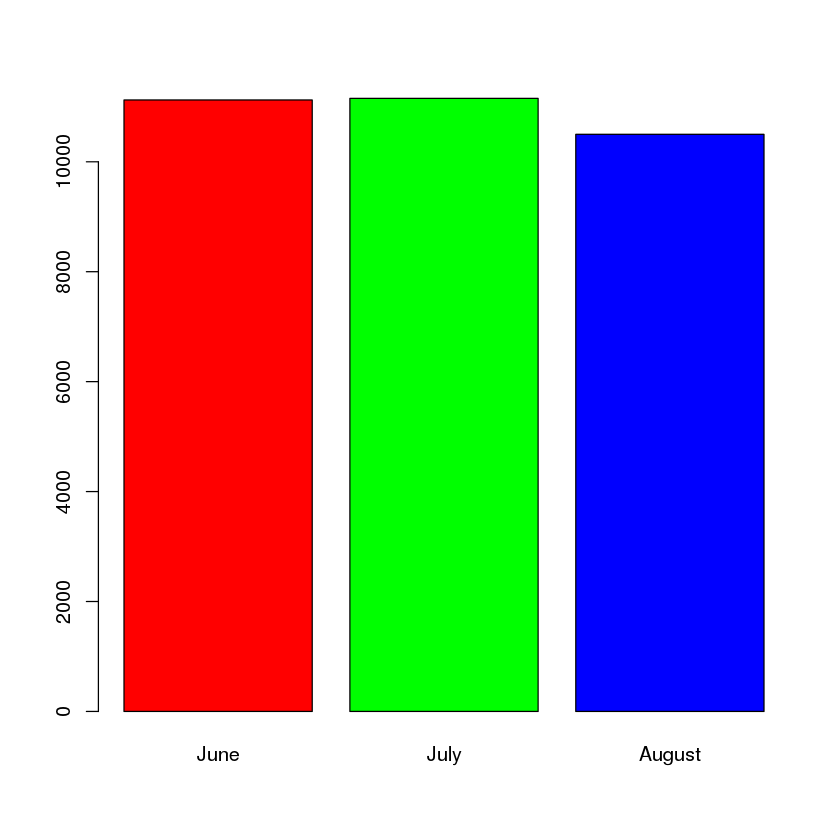

In [4]:
# first chart: create a histogram of the crimes per each month

month.factor = factor(seattle.data$Month,
                      levels = c(6, 7, 8), 
                      labels = c("June", "July", "August"))

plot(month.factor, col = c("red", "green", "blue"))

#### Breakdown by individual crimes

Below the crimes are organized by offense code, and visualized with their prevalence (black line) as a monthly average for the summer of 2014. This illustrates that a few frequent crime types cover the majority of all incidents. The corresponding monthly statistics are also displayed. It is also visible that the three months are very similar with regard to crime rate breakdown.

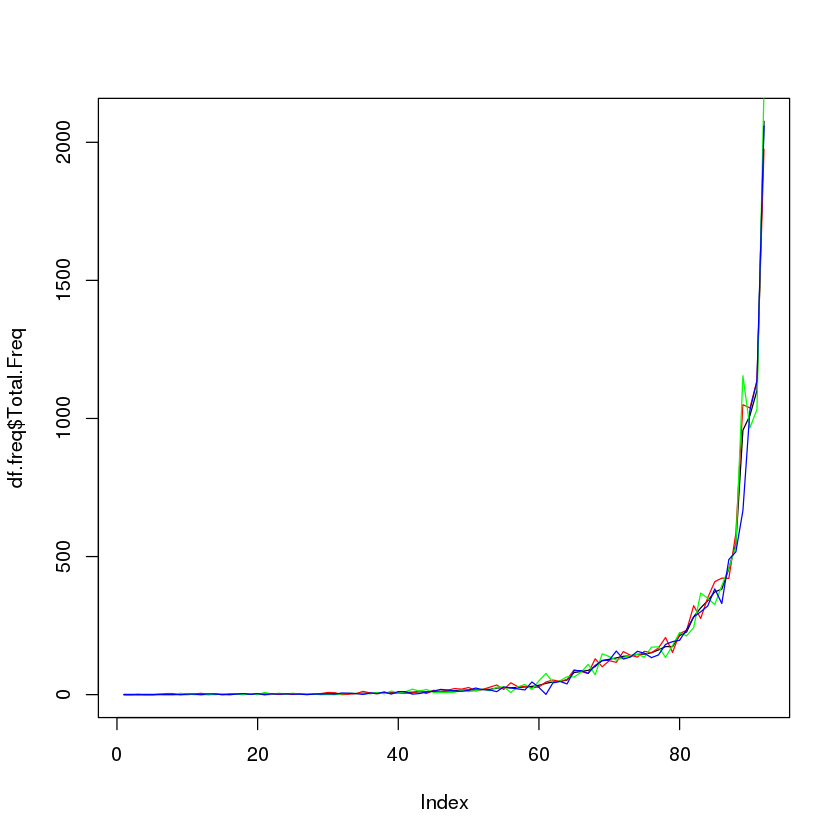

In [8]:
freq.table = sort(table(seattle.data$Offense.Code) / 3)
df.freq = data.frame(Offense.Code = names(freq.table),
                     Total.Freq = as.integer(freq.table))

june.freq.table = table(seattle.data$Offense.Code[seattle.data$Month == 6])
df.june.freq = data.frame(Offense.Code = names(june.freq.table),
                          June.Freq = as.integer(june.freq.table))

july.freq.table = table(seattle.data$Offense.Code[seattle.data$Month == 7])
df.july.freq = data.frame(Offense.Code = names(july.freq.table),
                          July.Freq = as.integer(july.freq.table))

aug.freq.table = table(seattle.data$Offense.Code[seattle.data$Month == 8])
df.aug.freq = data.frame(Offense.Code = names(aug.freq.table),
                          Aug.Freq = as.integer(aug.freq.table))

df.freq = merge(df.freq, df.june.freq, all.x = TRUE)
df.freq = merge(df.freq, df.july.freq, all.x = TRUE)
df.freq = merge(df.freq, df.aug.freq, all.x = TRUE)

df.freq = df.freq[order(df.freq$Total.Freq), ]

plot(df.freq$Total.Freq, col = "black", type = "l")
lines(df.freq$July.Freq, col = "red", type = "l")
lines(df.freq$June.Freq, col = "green", type = "l")
lines(df.freq$Aug.Freq, col = "blue", type = "l")

# legend("topleft", legend = c("Mean", "June", "July", "August"), 
#       col=c("black", "red", "green", "blue"), pch=1)
